<a href="https://colab.research.google.com/github/jalateras/kaggle-loan-approval/blob/main/kaggle_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
BASE_PATH = "./loan-approval"
train = pd.read_csv(f"{BASE_PATH}/train.csv")
test = pd.read_csv(f"{BASE_PATH}/test.csv")

In [ ]:
print(train.shape)
display(train.head())

(58645, 13)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
train.info()
train.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645,58645.000000,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000,58645.000000
unique,NaN,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,30594,NaN,12271,20984,NaN,NaN,NaN,49943,NaN,NaN
mean,29322.000000,27.550857,6.404617e+04,NaN,4.701015,NaN,NaN,9217.556518,10.677874,0.159238,NaN,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,NaN,3.959784,NaN,NaN,5563.807384,3.034697,0.091692,NaN,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


In [ ]:
list(train["loan_intent"].unique())

['EDUCATION',
 'MEDICAL',
 'PERSONAL',
 'VENTURE',
 'DEBTCONSOLIDATION',
 'HOMEIMPROVEMENT']

In [ ]:
list(train["person_home_ownership"].unique())

['RENT', 'OWN', 'MORTGAGE', 'OTHER']

In [ ]:
list(train["loan_grade"].unique())

['B', 'C', 'A', 'D', 'E', 'F', 'G']

In [ ]:
list(train["cb_person_default_on_file"].unique())

['N', 'Y']

In [ ]:
na_counts = train.isna().sum().sort_values(ascending=False)
display(na_counts[na_counts > 0])

,0


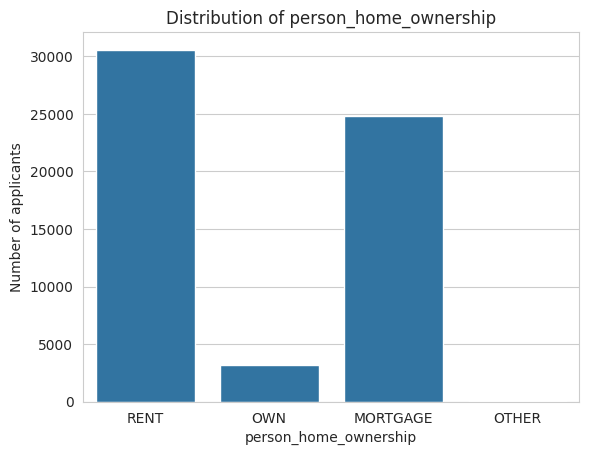

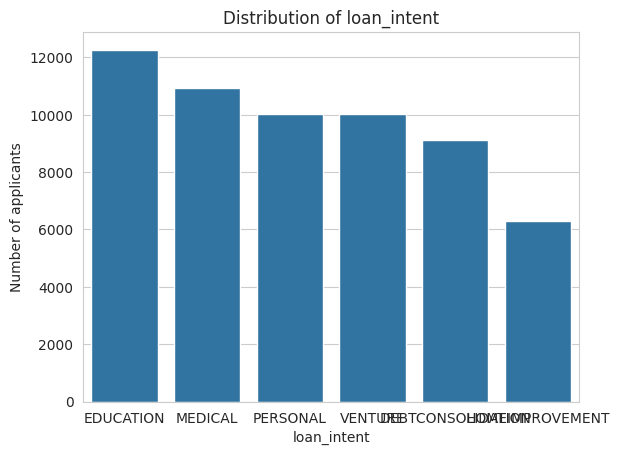

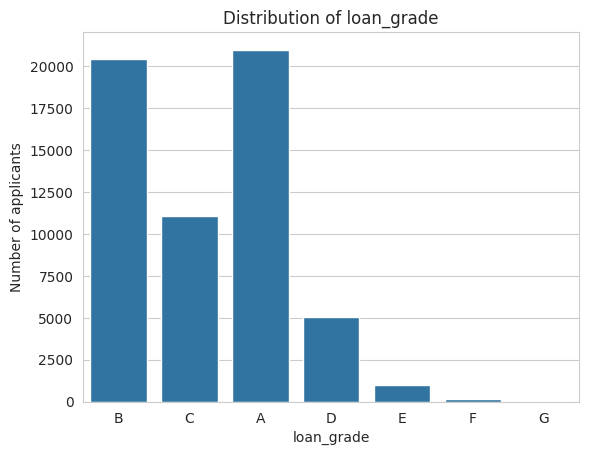

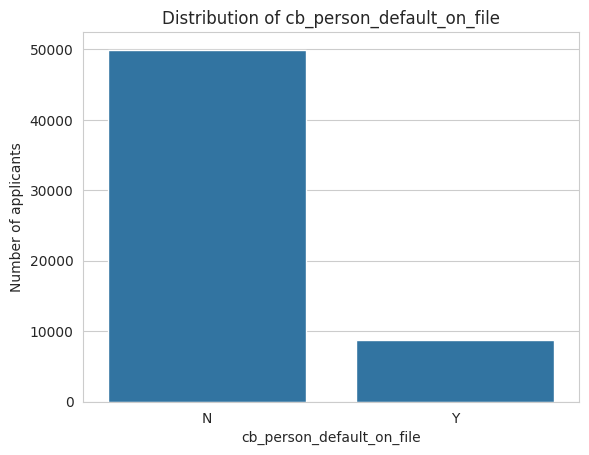

In [ ]:
ENUM_COLS = train.select_dtypes(include=["object"]).columns.tolist()
for col in ENUM_COLS:
  order = list(train[col].unique())
  sns.countplot(x=col, data=train, order=order)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Number of applicants")
  plt.show()


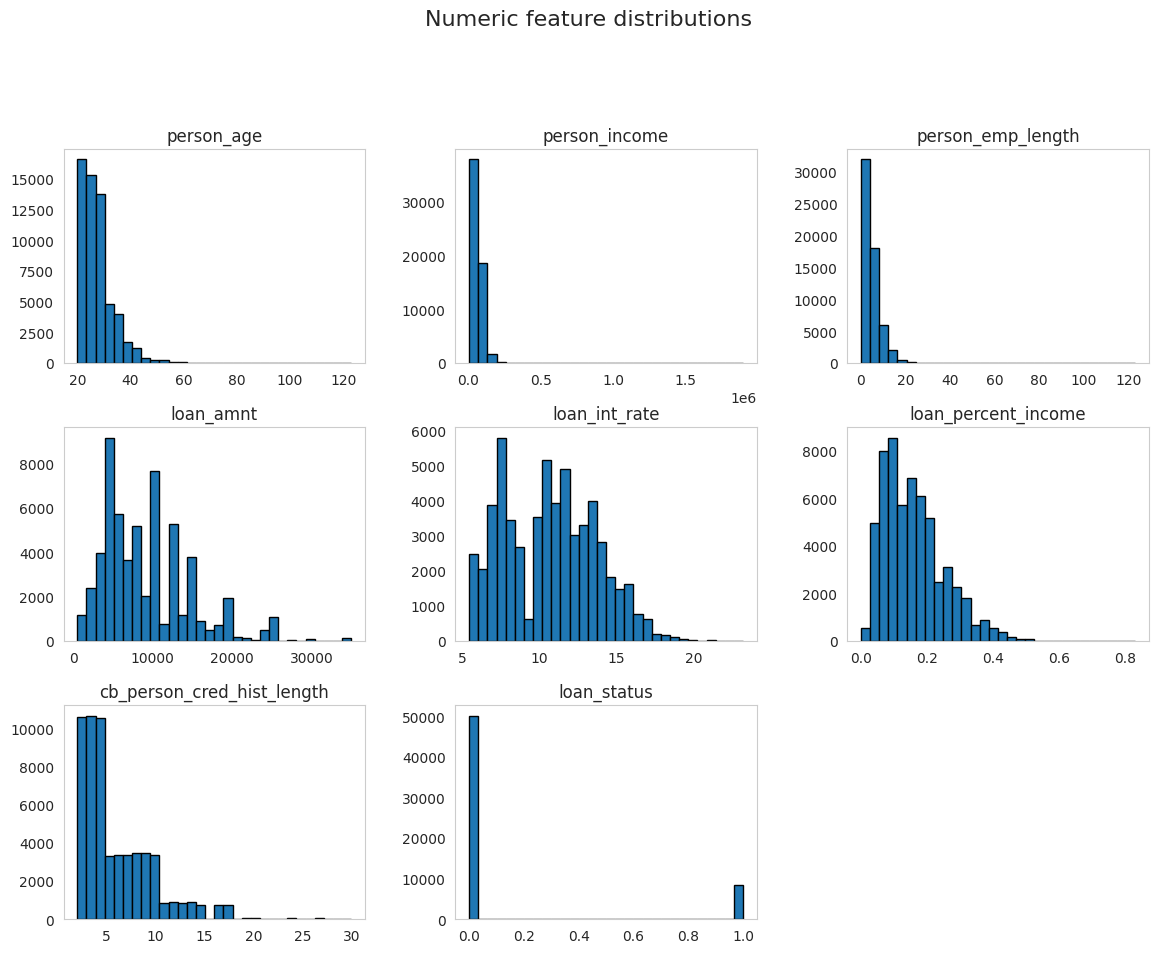

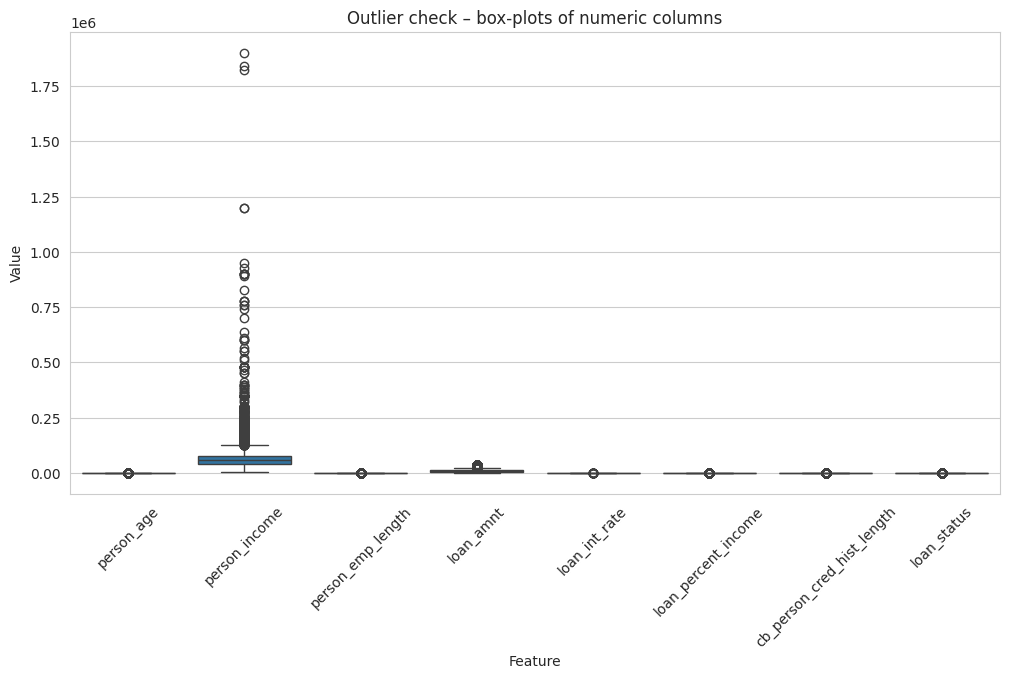

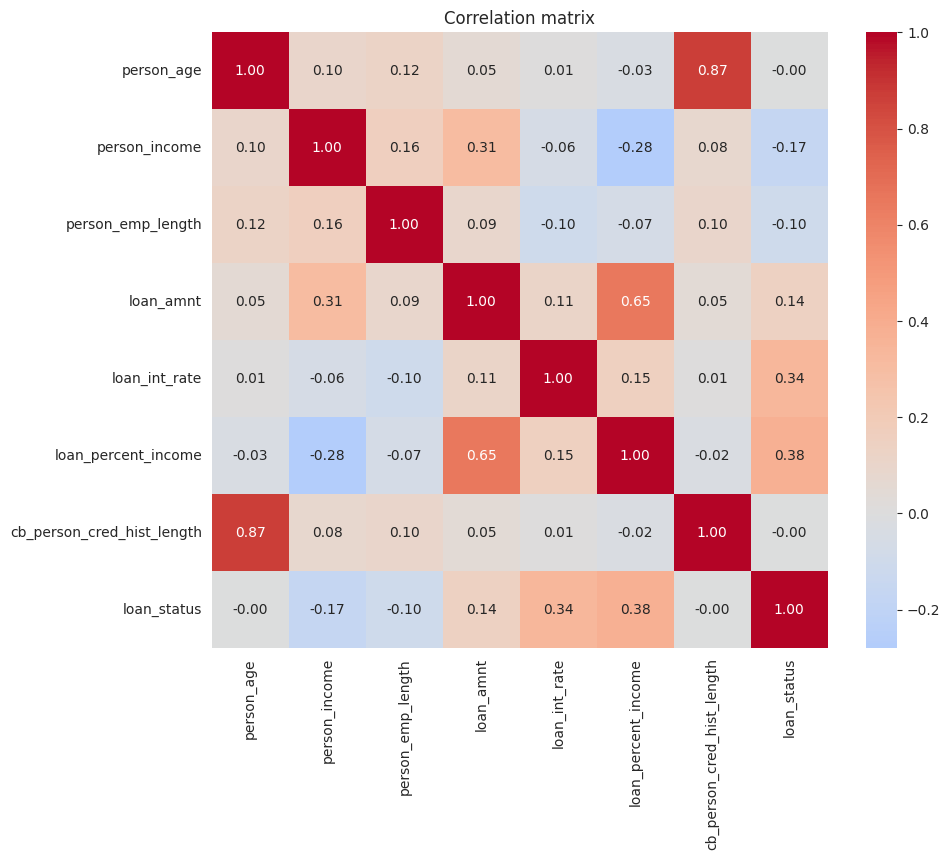

In [ ]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.drop("id")

# -------------------------------------------------
# 2) Histograms for distribution shape
# -------------------------------------------------
train[num_cols].hist(bins=30, figsize=(14, 10), grid=False, edgecolor="black")
plt.suptitle("Numeric feature distributions", y=1.02, fontsize=16)
plt.show()

# -------------------------------------------------
# 3) Box-plots for outliers
# -------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[num_cols].melt(var_name="Feature", value_name="Value"),
            x="Feature", y="Value")
plt.xticks(rotation=45)
plt.title("Outlier check – box-plots of numeric columns")
plt.show()


# -------------------------------------------------
# 5) Correlation heat-map
# -------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(train[num_cols].corr(), cmap="coolwarm", center=0,
            annot=True, fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()

In [ ]:
# ╔════════════════════════════════════════════════════════╗
# ║ 1.  Library installs (Colab)                           ║
# ╚════════════════════════════════════════════════════════╝
!pip -q install --upgrade pip          # always good to keep pip current

# Core tabular + tuning stack
!pip -q install catboost==1.2.3        # gradient-boosting with native cat support
!pip -q install optuna==3.5.0          # hyper-parameter optimisation
!pip -q install ydata-profiling==4.6.4 # optional, for auto-EDA reports

# GPU version of LightGBM if you plan to ensemble later
!pip -q install lightgbm==4.3.0 --extra-index-url https://download.pytorch.org/whl/cu121

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [optuna]
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 196.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 138.6 MB/s eta 0:00:00
  DEPRECATION: Building 'htmlmin' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replaceme

In [ ]:
# import and basic setup
# Core
import numpy as np
import pandas as pd
from pathlib import Path

# Modelling
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from google.colab import drive
!fusermount -u /content/drive
!rm -rf /content/drive

# Fresh mount
from google.colab import drive
drive.mount('/content/drive')

# Check again
!ls -la /content/drive/.Encrypted/MyDrive/

Mounted at /content/drive
total 16
drwx------ 2 root root 4096 May 23  2017  Classroom
drwx------ 2 root root 4096 Jun  5 04:07 'Colab Notebooks'
drwx------ 2 root root 4096 Feb 15  2013  nodejs
drwx------ 2 root root 4096 Feb 17  2021  Takeout


In [ ]:
!whoami

root
